In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_validate


In [2]:
data = pd.read_csv('patients_data_with_RVoutcomes.csv') #load
data = data.dropna(subset=['Birthday']) #preprocess data - drop nulls 
data['RV Dysfunction'] = data['RV Dysfunction'].replace('0', pd.NA) # Convert '0' to NaN
data = data.dropna(subset=['RV Dysfunction'])


In [3]:
X = data.select_dtypes(exclude=['object', 'string'])
Y = data['RV Dysfunction']
feature_names = X.columns


In [4]:
imputer = SimpleImputer(strategy='mean') #impute based on mean
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=feature_names)

Y_grouped = Y.replace({
 'Moderate': 'High Dysfunction',
 'Severe': 'High Dysfunction',
 'Normal': 'Low Dysfunction',
 'Mild': 'Low Dysfunction'
})
print(pd.unique(Y_grouped))

label_encoder = LabelEncoder()

Y_encoded = label_encoder.fit_transform(Y_grouped)


['High Dysfunction' 'Low Dysfunction']


In [5]:
#Standardize features to mean=0, variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #scaling each feature down to 0-1 



Cross-Validation Scores: [0.65934066 0.57777778 0.64444444 0.6        0.63333333]
Mean CV Accuracy: 0.6230 (+/- 0.0597)


/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Use

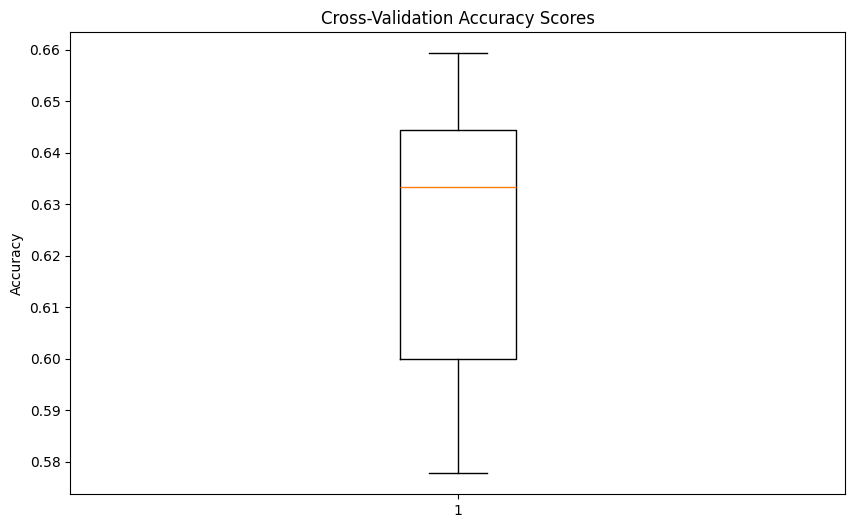

In [ ]:
# Perform Cross-Validation
def perform_cross_validation(X, y, model, cv=5):
    # Use StratifiedKFold to maintain class distribution
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Compute cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    
    # Print cross-validation results
    print(f"\nCross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return cv_scores

# Initialize the model
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, random_state=42)

# Perform cross-validation
cv_scores = perform_cross_validation(X_scaled, Y_encoded, log_reg)

# Visualize Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()


[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1]


/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


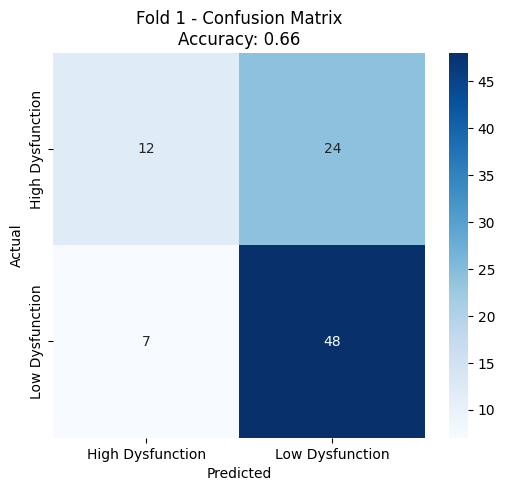

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_75777/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


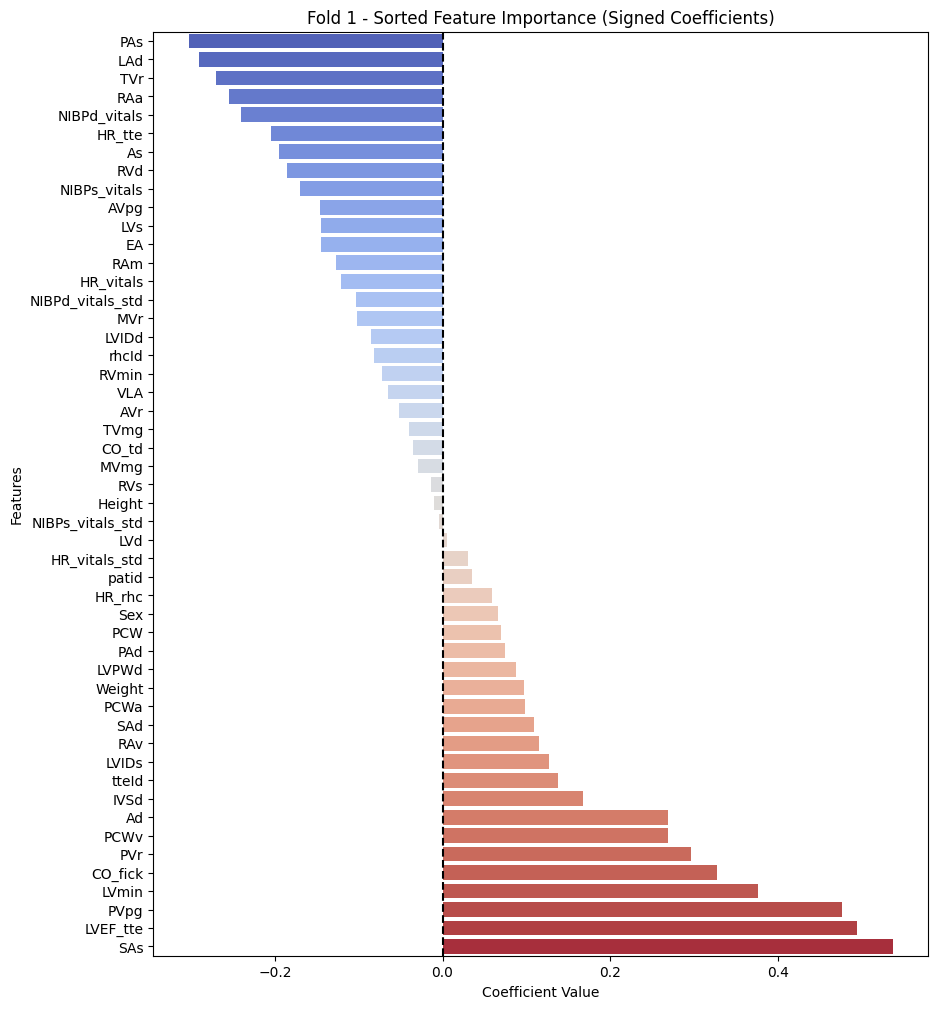

/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1]


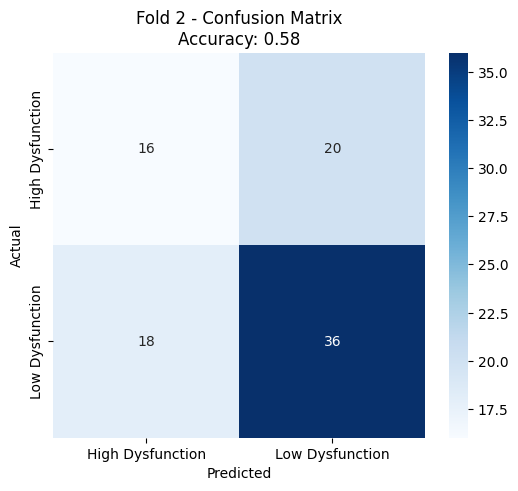

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_75777/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


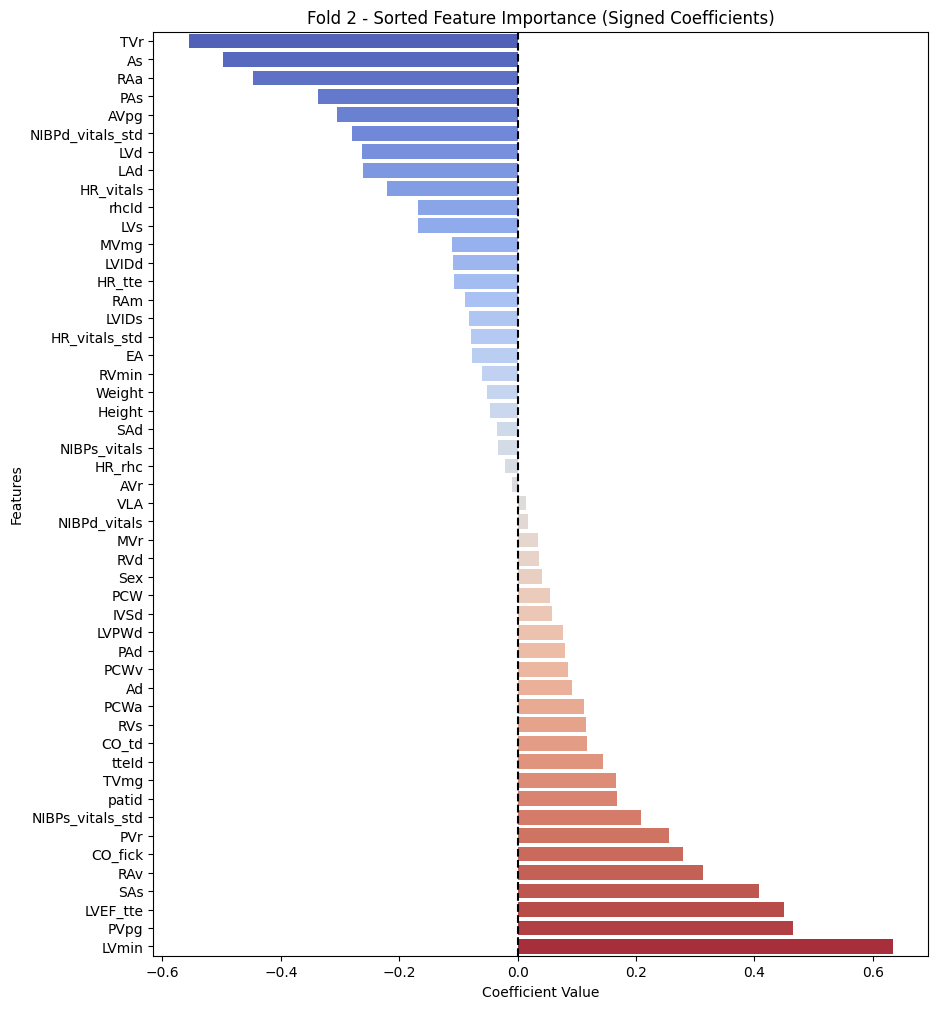

/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1]


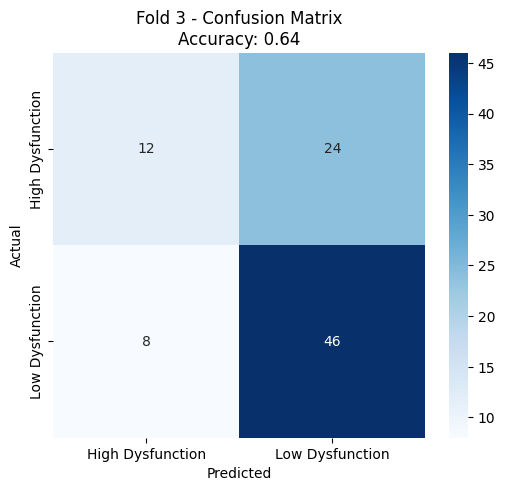

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_75777/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


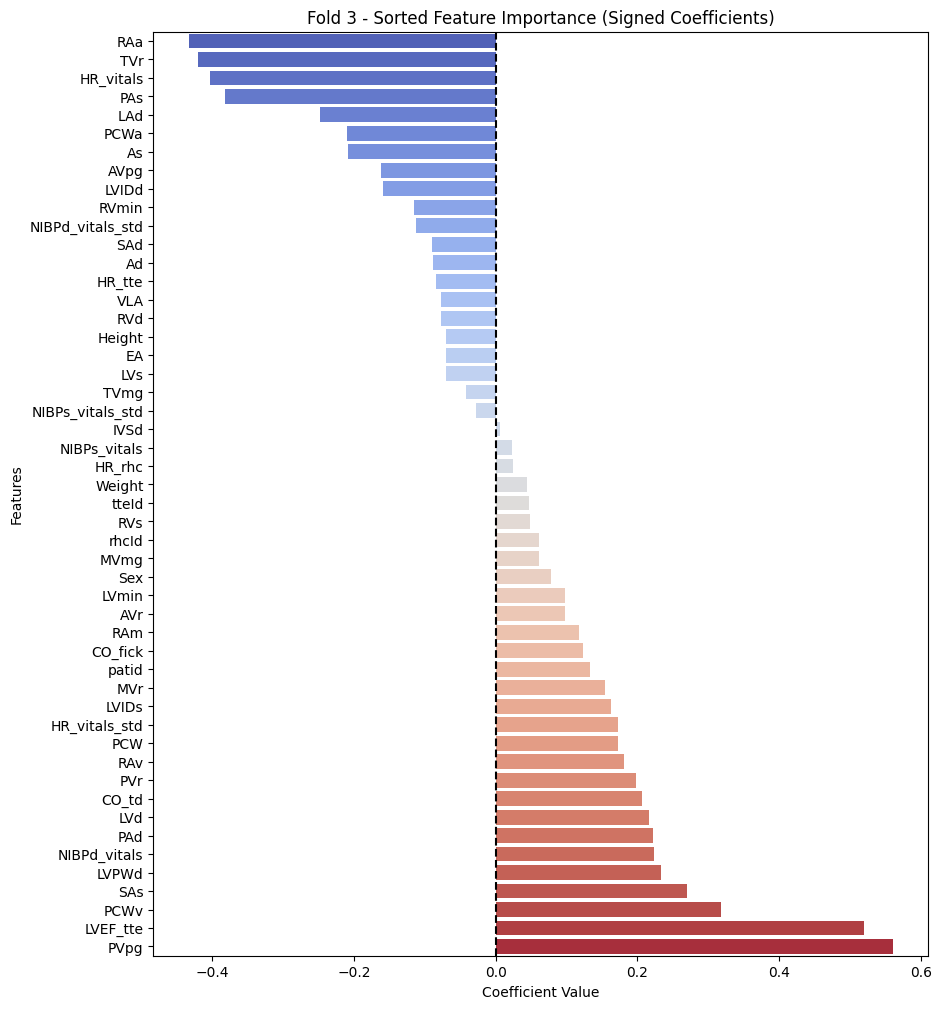

/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0]


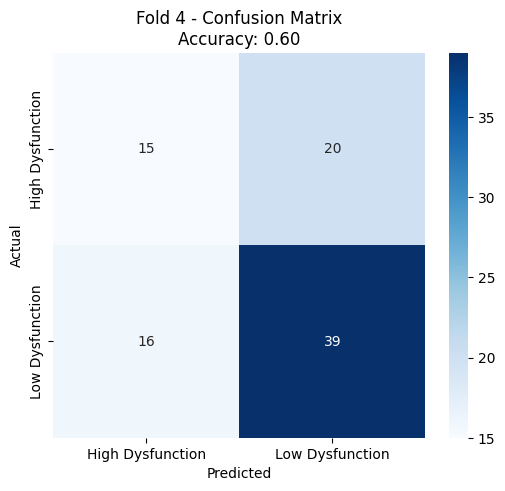

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_75777/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


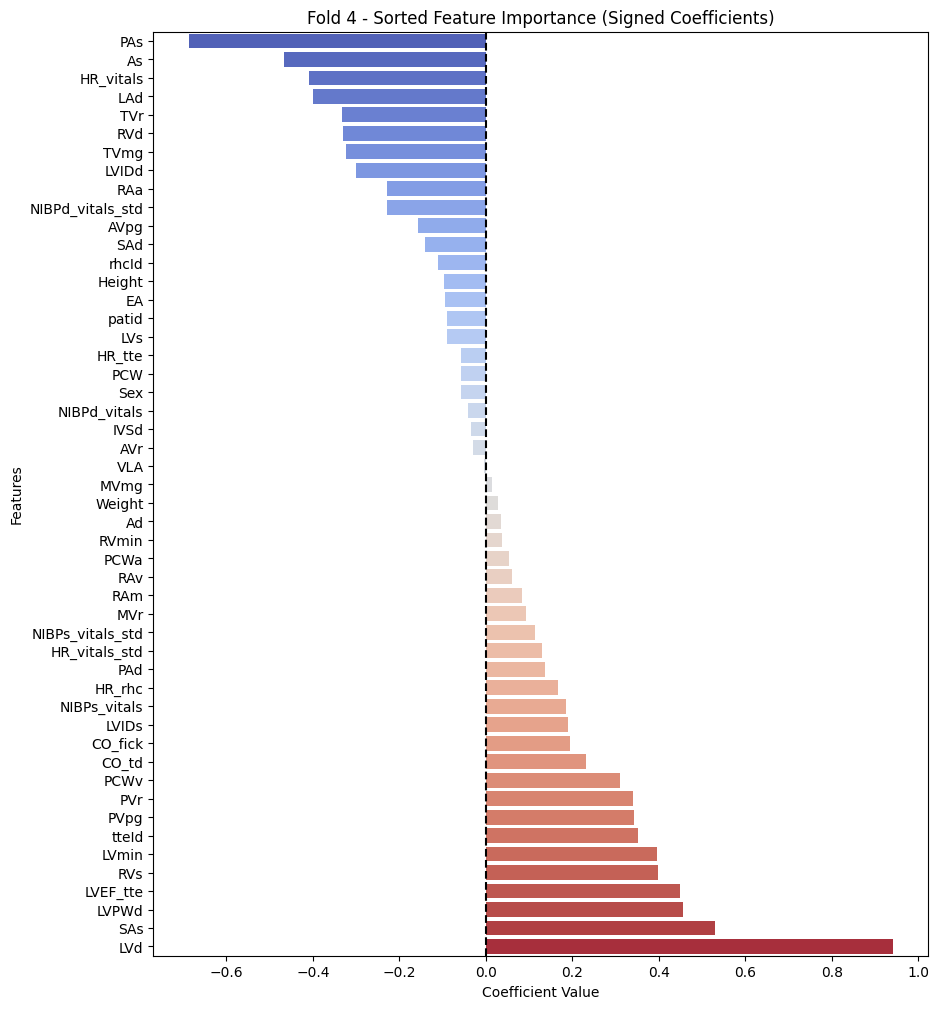

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1]


/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


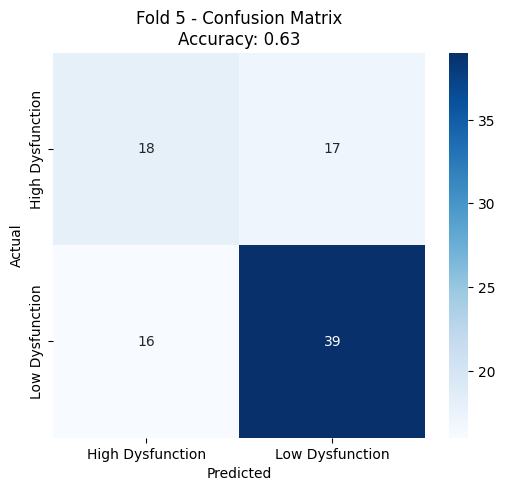

/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_75777/4272564547.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction


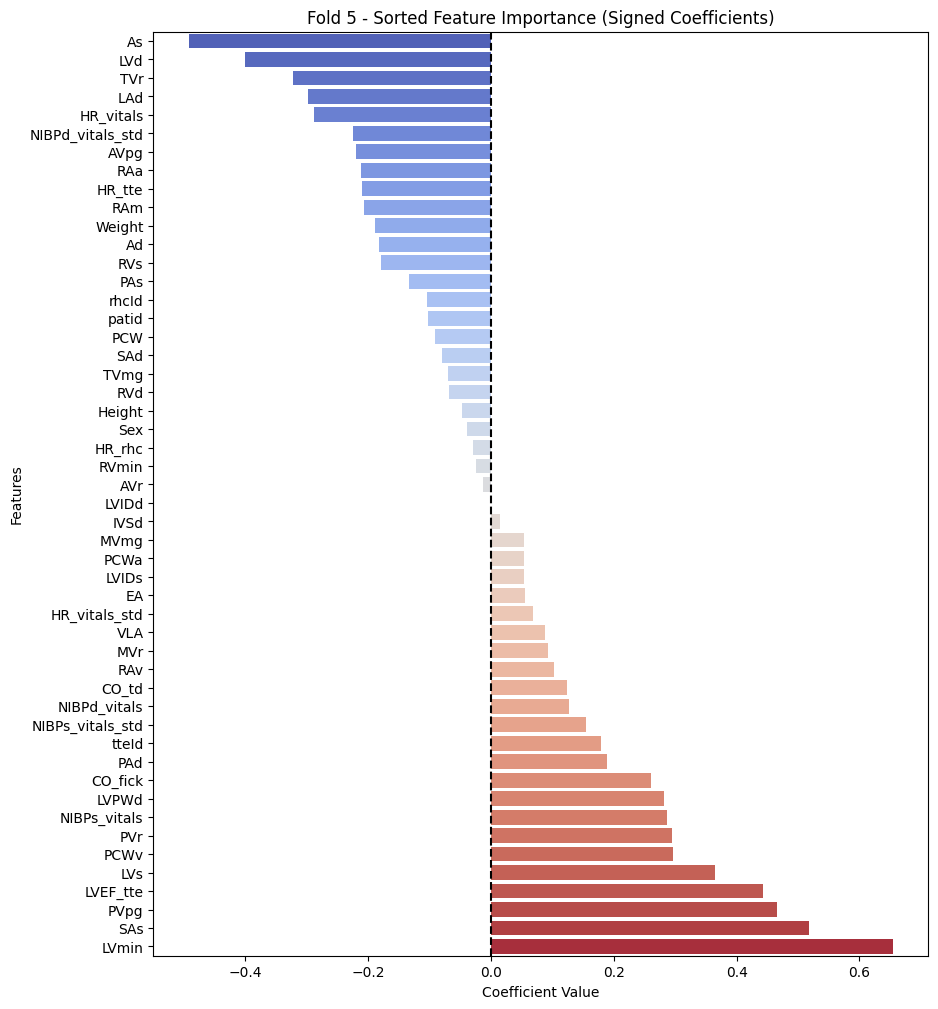

'Blue for negative & Red for positive impact.\nFeatures with positive coefficients (red) increase the probability of the target outcome.\nFeatures with negative coefficients (blue) decrease the probability of the target outcome.\nFeatures near 0 have low impact on predictions.'

In [10]:
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coefs = []
feature_names = X.columns  # Assuming X is a DataFrame
#print(feature_names)
for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, Y_encoded)):
    # Train model
    log_reg.fit(X_scaled[train_idx], Y_encoded[train_idx])
    
    # Store coefficients
    coefs.append(log_reg.coef_[0])  # Store raw coefficients
    
    # Confusion matrix plot
    y_pred = log_reg.predict(X_scaled[val_idx])
    cm = confusion_matrix(Y_encoded[val_idx], y_pred)
    print(y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Fold {fold+1} - Confusion Matrix\nAccuracy: {accuracy_score(Y_encoded[val_idx], y_pred):.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Sort by actual coefficient values
    coef_values = log_reg.coef_[0]
    sorted_indices = np.argsort(coef_values)  # Sort by raw values (not absolute)
    sorted_features = np.array(feature_names)[sorted_indices]
    sorted_coef_values = coef_values[sorted_indices]

    # Feature importance plot
    plt.figure(figsize=(10, 12))
    sns.barplot(x=sorted_coef_values, y=sorted_features, palette="coolwarm")  # Coolwarm for positive/negative distinction
    plt.axvline(x=0, color='black', linestyle='--')  # Add vertical line at 0 for reference
    plt.title(f'Fold {fold+1} - Sorted Feature Importance (Signed Coefficients)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()
    
'''Blue for negative & Red for positive impact.
Features with positive coefficients (red) increase the probability of the target outcome.
Features with negative coefficients (blue) decrease the probability of the target outcome.
Features near 0 have low impact on predictions.'''


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

#Pipeline object that chains multiple transformations together.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale data
    ('model', LogisticRegression(multi_class='ovr', max_iter=500, class_weight='balanced'))  # Step 2: Train model
])


/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pallakdhabalia/Documents/LVAD Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Use

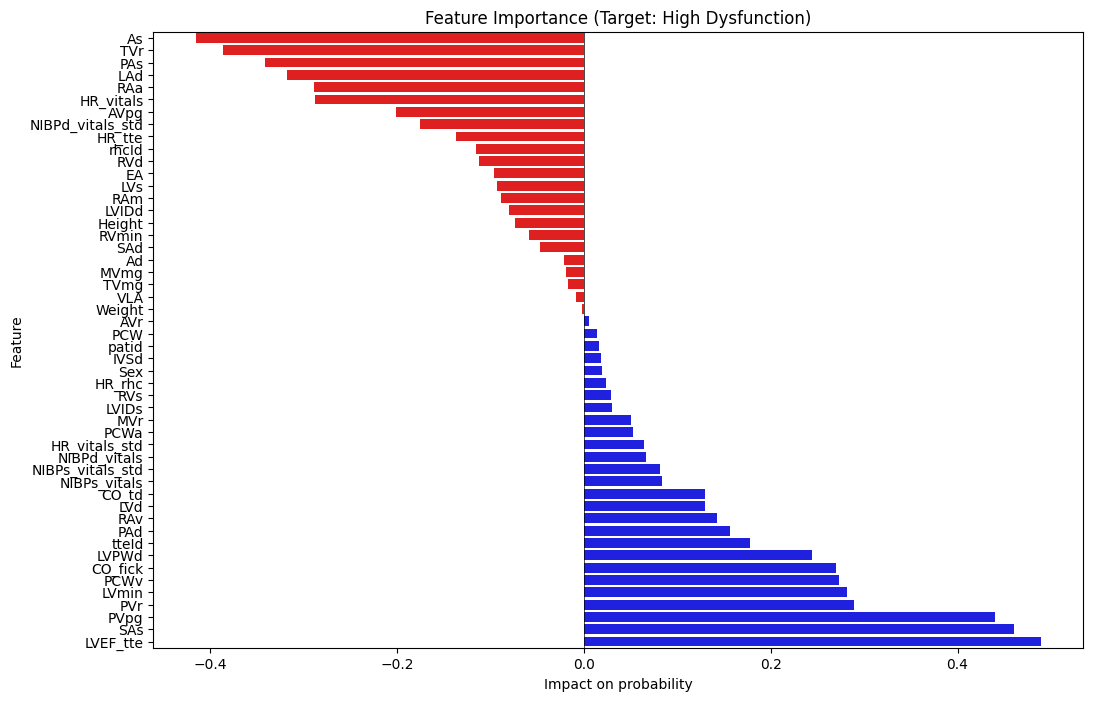

In [12]:
def plot_feature_importance(results, feature_names, class_name):
    coefs = [estimator.named_steps['model'].coef_[0] for estimator in results['estimator']]

    avg_coefs = np.mean(coefs, axis=0)
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': avg_coefs
    }).sort_values('Importance', ascending=True)  # Changed to ascending=True
    
    # Color code based on coefficient sign
    colors = ['red' if x < 0 else 'blue' for x in importance_df['Importance']]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)
    plt.title(f'Feature Importance (Target: {class_name})')
    plt.xlabel('Impact on probability')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.show()

results = cross_validate(
    pipeline,
    X_scaled,  # Your scaled features
    Y_encoded,  # Your encoded target
    cv=5,
    return_estimator=True  # This is important to get the fitted models
)
# Plot for High Dysfunction
plot_feature_importance(results, feature_names, "High Dysfunction")
#plot_feature_importance(results, feature_names, "Low Dysfunction")

In [13]:
data = pd.read_csv('patients_data_with_RVoutcomes.csv')
#print(data.columns.tolist())
# List of features to use, including the target variable
selected_features = [
    'patKey', 'patid', 'rhcId', 'RHCDate', 'Sex', 'Height', 'Weight', 'Birthday',
    'CO_td', 'CO_fick', 'PCW', 'PCWa', 'PCWv', 'PAs', 'PAd', 'RVs', 'RVmin', 'RVd',
    'RAa', 'RAv', 'RAm', 'LVs', 'LVd', 'LVmin', 'SAs', 'SAd', 'HR_rhc', 'HR_vitals',
    'HR_vitals_std', 'NIBPs_vitals', 'NIBPs_vitals_std', 'NIBPd_vitals',
    'NIBPd_vitals_std', 'As', 'Ad', 'tteId', 'TTEDate', 'LVIDd', 'LVIDs', 'HR_tte',
    'LVEF_tte', 'EA', 'IVSd', 'LVPWd', 'LAd', 'VLA', 'AVr', 'AVpg', 'MVr', 'MVmg',
    'TVr', 'TVmg', 'PVr', 'PVpg', 'AVr_str', 'MVr_str', 'TVr_str', 'PVr_str', 'patkey',
    'RV Dysfunction'
]

# Drop any rows with NaN values in any of the selected features
data = data[selected_features].dropna()

#Convert date/time object to number of days
data['RHCDate'] = pd.to_datetime(data['RHCDate']).apply(lambda x: x.toordinal())
data['TTEDate'] = pd.to_datetime(data['TTEDate']).apply(lambda x: x.toordinal())
data['Birthday'] = pd.to_datetime(data['Birthday']).apply(lambda x: x.toordinal())


In [14]:
feature_names = X.columns
print(feature_names)

Index(['patid', 'rhcId', 'Sex', 'Height', 'Weight', 'CO_td', 'CO_fick', 'PCW',
       'PCWa', 'PCWv', 'PAs', 'PAd', 'RVs', 'RVmin', 'RVd', 'RAa', 'RAv',
       'RAm', 'LVs', 'LVd', 'LVmin', 'SAs', 'SAd', 'HR_rhc', 'HR_vitals',
       'HR_vitals_std', 'NIBPs_vitals', 'NIBPs_vitals_std', 'NIBPd_vitals',
       'NIBPd_vitals_std', 'As', 'Ad', 'tteId', 'LVIDd', 'LVIDs', 'HR_tte',
       'LVEF_tte', 'EA', 'IVSd', 'LVPWd', 'LAd', 'VLA', 'AVr', 'AVpg', 'MVr',
       'MVmg', 'TVr', 'TVmg', 'PVr', 'PVpg'],
      dtype='object')


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
def train_and_evaluate(model, model_name, X_train, Y_train, X_test, Y_test, scores, max_roc_auc):
    """
    Trains and evaluates a classification model.
    Prints classification report, confusion matrix, and calculates ROC AUC.
    """

    print(f"\n--- {model_name} ---")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred, target_names=label_encoder.classes_))

    # Print confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(Y_test, Y_pred)
    cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate ROC AUC
    Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    roc_auc = roc_auc_score(Y_test, Y_pred_proba)
    scores.append(roc_auc)
    if(roc_auc > max(scores)):
        print("current max roc_auc: ", roc_auc)
        max_roc_auc = roc_auc
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return max_roc_auc
#True Positive Rate (TPR) = recall

The higher the AUC, the better the model is at distinguishing between the positive and negative classes.

We are using 5-fold cross-validation. This means the training data is split into 5 parts. GridSearchCV trains and tests the model 5 times, each time using a different part as the test set.
Performance Evaluation: GridSearchCV keeps track of how well each hyperparameter combination performs during cross-validation.

Regularization: Regularization is a technique used to prevent overfitting in machine learning models. Overfitting happens when a model learns the training data too well, including its noise and specific details, and performs poorly on new, unseen data. Regularization adds a penalty to the model's complexity to discourage it from overfitting.


986

--- Random Forest ---

Classification Report:
                  precision    recall  f1-score   support

High Dysfunction       0.54      0.36      0.43        36
 Low Dysfunction       0.66      0.80      0.72        55

        accuracy                           0.63        91
       macro avg       0.60      0.58      0.58        91
    weighted avg       0.61      0.63      0.61        91


Confusion Matrix:


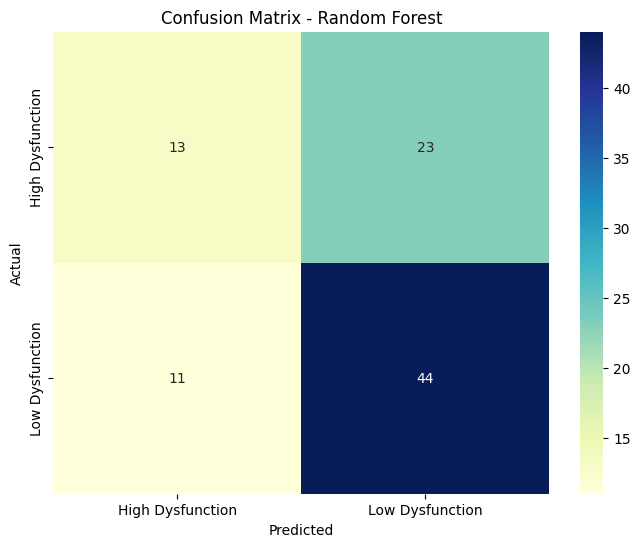

ROC AUC: 0.5616


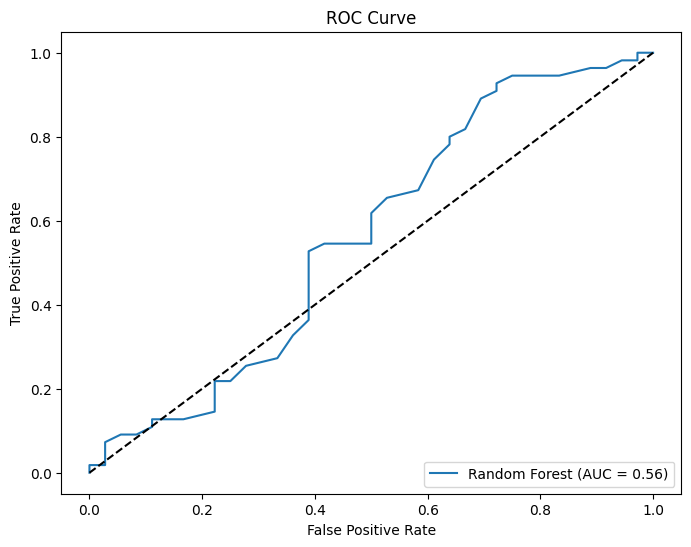

0


In [18]:
import random
seed = random.randint(0, 1000) 
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, stratify=Y_encoded, random_state=seed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
print(seed)
max_roc_auc = 0
print(train_and_evaluate(rf_model, "Random Forest", X_train, Y_train, X_test, Y_test, scores, max_roc_auc) )


--- Support Vector Machine ---

Classification Report:
                  precision    recall  f1-score   support

High Dysfunction       0.48      0.31      0.37        36
 Low Dysfunction       0.63      0.78      0.70        55

        accuracy                           0.59        91
       macro avg       0.56      0.54      0.54        91
    weighted avg       0.57      0.59      0.57        91


Confusion Matrix:


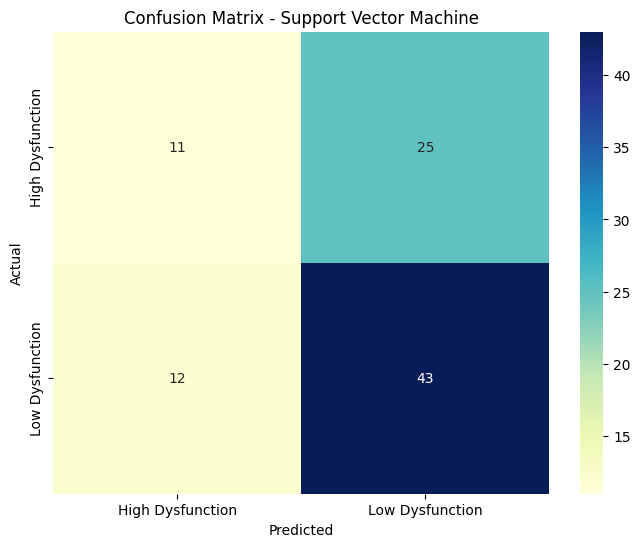

ROC AUC: 0.5854


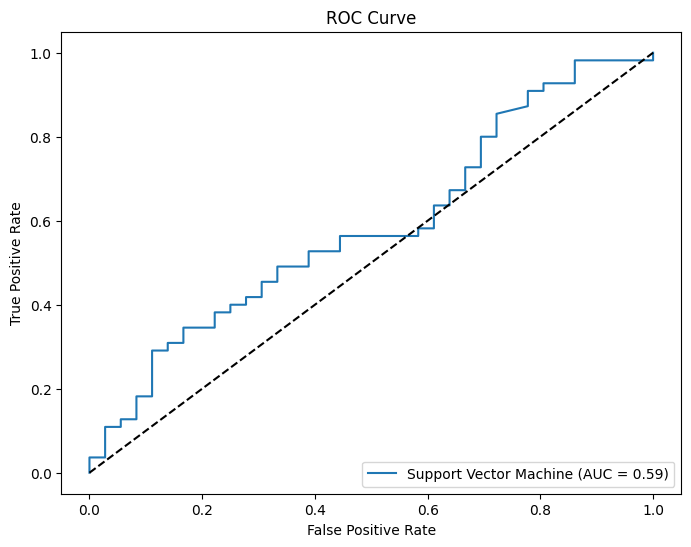

0

In [20]:
svm_model = SVC(probability=True, random_state=42)  # probability=True for ROC AUC
train_and_evaluate(svm_model, "Support Vector Machine", X_train, Y_train, X_test, Y_test, scores, max_roc_auc)